# Description


# Background and Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term.
The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can benefit the workers in this field, as the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning. The ability to do so far more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


# Objective
The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.


# Data Description

This dataset contains images of unique plants belonging to 12 different species.
•	The data file names are:
o	images.npy
o	Label.csv
•	Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
•	The goal of the project is to create a classifier capable of determining a plant's species from an image.
List of Plant species
•	Black-grass
•	Charlock
•	Cleavers
•	Common Chickweed
•	Common Wheat
•	Fat Hen
•	Loose Silky-bent
•	Maize
•	Scentless Mayweed
•	Shepherds Purse
•	Small-flowered Cranesbill
•	Sugar beet

# Import libraries

In [1]:
!pip install opencv-python
!pip install cv2-plt-imshow

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Reading the dataset

In [3]:
# Load the image file of the dataset
images = np.load('/Users/URSMAR/Desktop/PGP AI/Project2/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/Users/URSMAR/Desktop/PGP AI/Project2/Labels.csv')

# Overview of the dataset

Let's print the shape of the images and labels

In [4]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4,750 RGB images of shape 128 x 128 X 3, each image having 3 channels. 

There are 4,750 labels for the images.

# Plotting images using OpenCV and matplotlib

In [5]:
cv2.imshow('images',images[5])

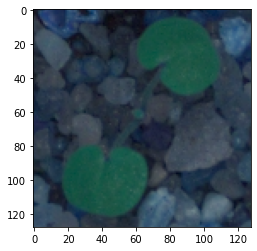

In [6]:
plt.imshow(images[5])

We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.

Now we will convert these BGR images to RGB images so we could interpret them easily.

In [7]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

# Exploratory Data Analysis

In [8]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image 
          ax.set_title(keys[random_index])
  plt.show()

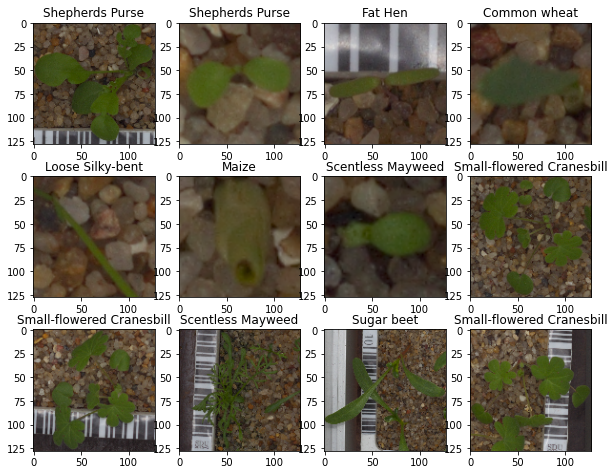

In [9]:
plot_images(images,labels)

# Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

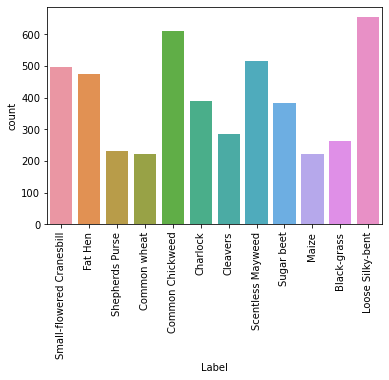

In [10]:
sns.countplot(labels['Label'])
plt.xticks(rotation='vertical')

As you can see from the above plot, the dataset is imbalanced with Loose Silky-bent and Common Chickweed having over 600 images each.

Common wheat has the least number of images (about 200 images).

# Resizing images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [11]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

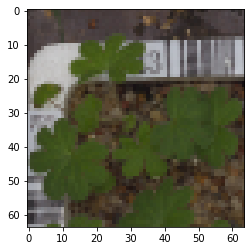

In [12]:
plt.imshow(images_decreased[3])

# Visualizing images using Gaussian Blur

In [13]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

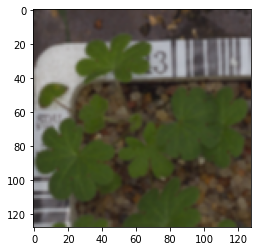

In [14]:
plt.imshow(images_gb[3])

It appears that GaussianBlur would be ineffective because the blurred or denoised image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

# Splitting the dataset
As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.


In [15]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)


In [16]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


# Making the data compatible:

Convert labels from names to one hot vectors

Normalizing the values

# Encoding the target labels

In [17]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder 

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

# Data Normalization

Since the image pixel values range from 0-255, our method of normalization here will be scaling - we shall divide all the pixel values by 255 to standardize the images to have values between 0-1.

In [18]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

# Model Building - Convolutional Neural Network (CNN)

Let's create a CNN model sequentially, where we will be adding the layers one after another.

First, we'll clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, we'll fix the seed again after clearing the backend.

Let's set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow to be able to reproduce the same results every time we run the code.

In [19]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [20]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a CNN Model with the following 2 main parts -

The Feature Extraction layers which are comprised of convolutional and pooling layers.
The Fully Connected classification layers for prediction.


In [21]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 16)                1

The total parameters and trainable parameters are both 151,548.

# Fitting the model on the train data

In [22]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 14s - loss: 2.4660 - accuracy: 0.1256 - val_loss: 2.4494 - val_accuracy: 0.1285 - 14s/epoch - 114ms/step
Epoch 2/30
121/121 - 11s - loss: 2.4185 - accuracy: 0.1380 - val_loss: 2.3992 - val_accuracy: 0.2079 - 11s/epoch - 90ms/step
Epoch 3/30
121/121 - 11s - loss: 2.3712 - accuracy: 0.1635 - val_loss: 2.3506 - val_accuracy: 0.2243 - 11s/epoch - 89ms/step
Epoch 4/30
121/121 - 11s - loss: 2.3334 - accuracy: 0.1817 - val_loss: 2.2847 - val_accuracy: 0.2266 - 11s/epoch - 90ms/step
Epoch 5/30
121/121 - 11s - loss: 2.2857 - accuracy: 0.1960 - val_loss: 2.2382 - val_accuracy: 0.2360 - 11s/epoch - 90ms/step
Epoch 6/30
121/121 - 11s - loss: 2.2794 - accuracy: 0.1921 - val_loss: 2.2297 - val_accuracy: 0.2593 - 11s/epoch - 91ms/step
Epoch 7/30
121/121 - 11s - loss: 2.2486 - accuracy: 0.2100 - val_loss: 2.1923 - val_accuracy: 0.2593 - 11s/epoch - 90ms/step
Epoch 8/30
121/121 - 11s - loss: 2.2364 - accuracy: 0.2111 - val_loss: 2.2108 - val_accuracy: 0.2593 - 11s/epoch - 89ms/step

In 30 epochs, the accuracy on the train dataset improved from 51.36 to 57.9%

The accuracy on the validation set improved from 58.41% to 65.19%

# Model Evaluation

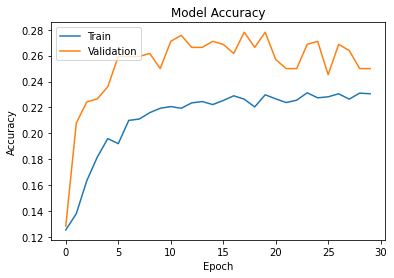

In [23]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Observations:

We can see from the above plot that the validation accuracy of the model was good but the training accuracy was not good.

The model seems to underfit on the data.

# Evaluating the model on test data

In [24]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 2.0028 - accuracy: 0.2484 - 358ms/epoch - 24ms/step


# Generating the predictions using test data

In [25]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 24ms/step


In [26]:
y_pred

array([[2.2767922e-02, 1.1097504e-01, 7.4726157e-02, ..., 6.7034923e-02,
        1.2648287e-01, 6.7736849e-02],
       [2.2767922e-02, 1.1097504e-01, 7.4726157e-02, ..., 6.7034923e-02,
        1.2648287e-01, 6.7736849e-02],
       [2.2767922e-02, 1.1097504e-01, 7.4726157e-02, ..., 6.7034923e-02,
        1.2648287e-01, 6.7736849e-02],
       ...,
       [2.0683432e-01, 1.6762057e-06, 1.0819215e-03, ..., 4.6826556e-09,
        2.2693051e-03, 7.3932029e-02],
       [2.2767922e-02, 1.1097504e-01, 7.4726157e-02, ..., 6.7034923e-02,
        1.2648287e-01, 6.7736849e-02],
       [2.2767922e-02, 1.1097504e-01, 7.4726157e-02, ..., 6.7034923e-02,
        1.2648287e-01, 6.7736849e-02]], dtype=float32)

# Plotting the Confusion Matrix

The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.

The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.

We will use the argmax() function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

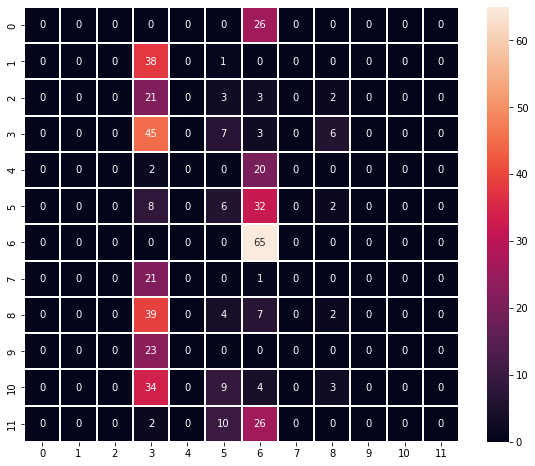

In [27]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Observations

We observe that some of the classes are not predicted correctly.

Classes 0 (Small-flowered cranesbill) and 6 (Cleavers) had the highest correlated misclassification (23) followed by classes 7 and 3 with the second highest misclassifications (16).

In comparison to the rest, we can see that classes 2 was well classified.


# Model-2

As we can see, our initial model appears to underfit. Therefore we'll try to address this problem with data augmentation and Batch Normalization to check if we can improve the model's performance.

# Data Augmentation

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is Data Augmentation. CNNs have the property of translational invariance, which means they can recognise an object even if its appearance shifts translationally in some way.
Taking this attribute into account, we can augment the images using the techniques listed below -
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

In [28]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [29]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [30]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

In [31]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 13s 202ms/step - loss: 2.1859 - accuracy: 0.2078 - val_loss: 2.3972 - val_accuracy: 0.1519
Epoch 2/25
60/60 [==============================] - 12s 197ms/step - loss: 1.7741 - accuracy: 0.3791 - val_loss: 2.2778 - val_accuracy: 0.3131
Epoch 3/25
60/60 [==============================] - 12s 195ms/step - loss: 1.5542 - accuracy: 0.4348 - val_loss: 2.1300 - val_accuracy: 0.3879
Epoch 4/25
60/60 [==============================] - 12s 196ms/step - loss: 1.4224 - accuracy: 0.4867 - val_loss: 2.0320 - val_accuracy: 0.4322
Epoch 5/25
60/60 [==============================] - 12s 195ms/step - loss: 1.3189 - accuracy: 0.5181 - val_loss: 1.7929 - val_accuracy: 0.4509
Epoch 6/25
60/60 [==============================] - 12s 194ms/step - loss: 1.2392 - accuracy: 0.5488 - val_loss: 1.5849 - val_accuracy: 0.5257
Epoch 7/25
60/60 [==============================] - 12s 196ms/step - loss: 1.1858 - accuracy: 0.5715 - val_loss: 1.4925 - val_accuracy: 0.5491

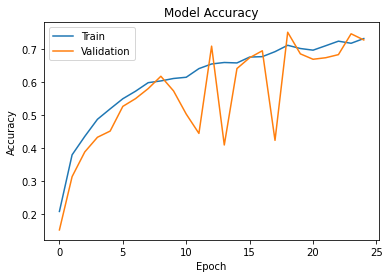

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.9685 - accuracy: 0.7411 - 349ms/epoch - 23ms/step


We can observe that our accuracy has improved compared to our previous model and it also no longer undefitting.

In [34]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

15/15 [==============================] - 0s 22ms/step


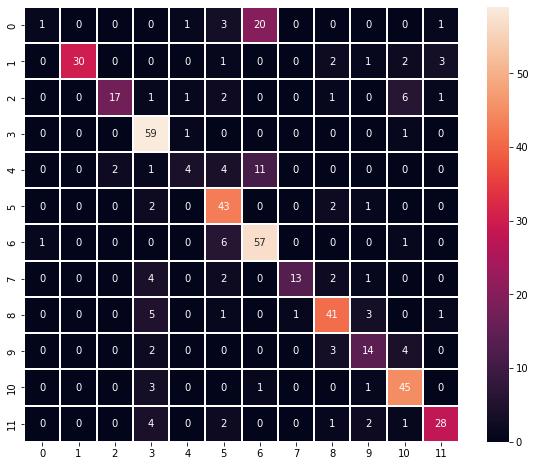

In [35]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Observation:

The confusion matrix appears to be improving as well, however there is still some confusion with the 0,6 classes of plants.

The 0th class is the most confused class among all.

We can observe that this model has outperformed our previous model.

# Transfer Learning using VGG16

Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built architecture - VGG16, which was trained on the ImageNet dataset.

For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.

In [36]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [37]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [38]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-

The new model has 14,780,988 total parameters and 66,380 trainable parameters.

In [39]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/25
60/60 [==============================] - 49s 808ms/step - loss: 2.3718 - accuracy: 0.1835 - val_loss: 2.2741 - val_accuracy: 0.2383
Epoch 2/25
60/60 [==============================] - 49s 823ms/step - loss: 2.1960 - accuracy: 0.2503 - val_loss: 2.1050 - val_accuracy: 0.3271
Epoch 3/25
60/60 [==============================] - 49s 815ms/step - loss: 2.0021 - accuracy: 0.3265 - val_loss: 1.9468 - val_accuracy: 0.3785
Epoch 4/25
60/60 [==============================] - 49s 822ms/step - loss: 1.8612 - accuracy: 0.3746 - val_loss: 1.8162 - val_accuracy: 0.3949
Epoch 5/25
60/60 [==============================] - 51s 850ms/step - loss: 1.7421 - accuracy: 0.4002 - val_loss: 1.6964 - val_accuracy: 0.4322
Epoch 6/25
60/60 [==============================] - 52s 863ms/step - loss: 1.6585 - accuracy: 0.4240 - val_loss: 1.6492 - val_accuracy: 0.4136
Epoch 7/25
60/60 [==============================] - 52s 859ms/step - loss: 1.5637 - accuracy: 0.4626 - val_loss: 1.5530 - val_accuracy: 0.4439

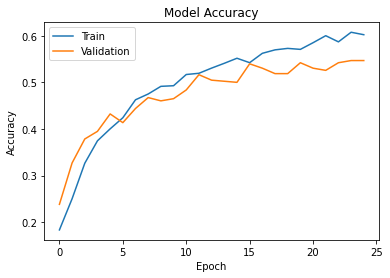

In [40]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 6s - loss: 1.2538 - accuracy: 0.5495 - 6s/epoch - 373ms/step


In [42]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 [==============================] - 6s 380ms/step


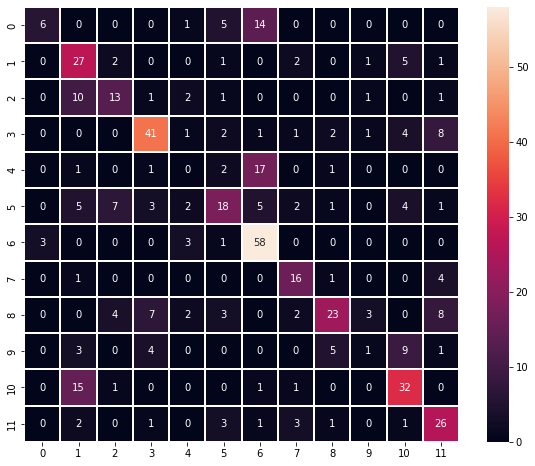

In [43]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

According to the confusion matrix and accuracy curve, the VGG16 model worsened the accuracy of classifications with a drop from 78.9% to 56.6%. 

Model 2 (using data augmentation) is our best model to predict and visualize some test images.

# Visualizing the prediction:

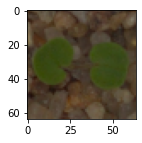

1/1 [==============================] - 0s 36ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


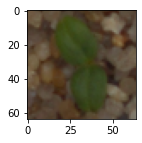

1/1 [==============================] - 0s 36ms/step
Predicted Label ['Cleavers']
True Label Cleavers


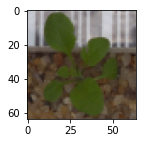

1/1 [==============================] - 0s 33ms/step
Predicted Label ['Charlock']
True Label Shepherds Purse


In [44]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(new_model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])  

# Conclusion

We can observe from the confusion matrix of all the models that our model2 (using Data Augmentation) was the best model because it predicted the majority of the classes better than the other models.

The test accuracy of the model is 78.9%.

Transfer learning has also helped in improving the model.

Simply employing the Data Augmentation model can produce a better outcome than any ordinary CNN.


In [45]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['57.92%','77.66%','59.48%'],'Validation Accuracy':['65.19%','65.75%','55.84%'],'Test Accuracy':['63.79%','78.95%','56.63%']})

,Models,Train Accuracy,Validation Accuracy,Test Accuracy
0,Base CNN Model,57.92%,65.19%,63.79%
1,CNN Model with Data Augmentation,77.66%,65.75%,78.95%
2,Transfer Learning Model,59.48%,55.84%,56.63%


# Scope of Improvement

These models can be further improved by training with different filter sizes and different number of filters.

These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.

Data Augmentation can be performed more and dropout_rate can be changed to improve the model performance.